In [1]:
%matplotlib inline 
from IPython.core.display import display

import pylab as plot
params = {
    'legend.fontsize': 18,
    'axes.labelsize': 18,
}
plot.rcParams.update(params)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
import numpy as np
import pandas as pd
from sympy import *
from sympy.utilities.lambdify import lambdify
import matplotlib.figure
init_printing()
#from math import *
from interval import interval, inf
from interval import imath
import sys
from pprint import pprint
import datetime
import os

In [2]:
! echo '' > find_all_solution.out
from ivmat import ivmat as ip
from fmat import fmat
from krawczyk import Krawczyk
from symbol_derivative import(
    get_f_df_ddf_from_symbol_representation,
    get_global_minima_from_f_expr,
    calc_f_expr_meshgrid,
    plot3D,
    visualize_optimization_log,
)
from nelder_mead import (
    NelderMead,
)

## RASTRIGIN FUNCTION
https://www.sfu.ca/~ssurjano/rastr.html

In [3]:
num = 2
args = (x_1, x_2)= symbols("x1:{}".format(num+1))
var('a,b,c,d')
f_expr = 10*2
for x in args:
    f_expr += x**2 - 10*cos(2*pi*x)
display(f_expr)

8.95460130465


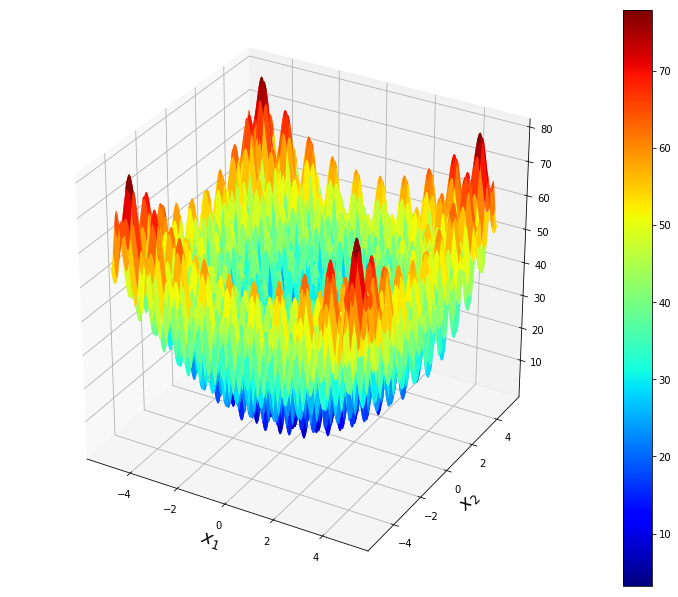

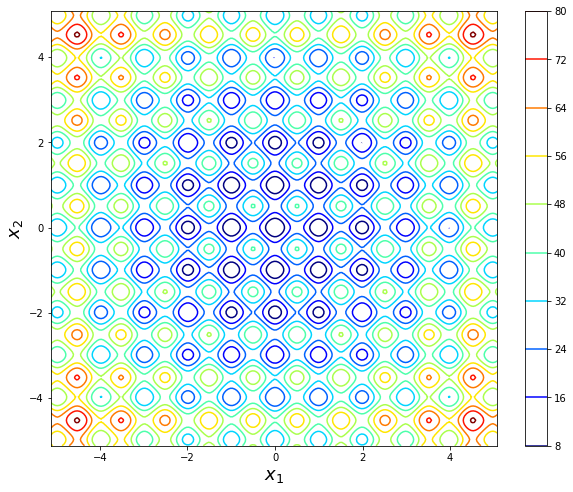

In [4]:
np_func = lambdify([args], f_expr, modules=np)
# seed_num = 12345
# np.random.seed(seed_num)
low = -5.12
high = 5.12
points = np.random.uniform(low=low, high=high, size=(3,2))
nelder = NelderMead(np_func, points)
#local_minima, points_history = nelder.run()
local_minima = np.inf

x = np.arange(low, high, 0.05) 
y = np.arange(low, high, 0.05) 
X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis].tolist()
Z = np.array([np_func(_args) for _args in args_list]).reshape(X.shape)

#nelder.save_figs(X, Y, Z, points_history)

points_histories = []
for i in range(1):
    points = np.random.uniform(low=low, high=high, size=(3,2))
    nelder = NelderMead(np_func, points)
    _local_minima, points_history = nelder.run(50)
    points_histories.append(points_history)
    local_minima = min(local_minima, _local_minima)
points_histories = np.array(points_histories)
print local_minima

#nelder.save_multi_points_figs(X, Y, Z, points_histories)

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
surf = ax.plot_surface(X,Y,Z, rstride=3, cstride=5, cmap=cm.jet, linewidth=1) 
fig.colorbar(surf)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


fig = plt.figure(figsize=(10, 8))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
im =plt.contour(X, Y, Z, 10, shading='gouraud',cstride=5, cmap=cm.jet)
fig.colorbar(im)
local_min = 1.78e-15

In [5]:
f, df, ddf = get_f_df_ddf_from_symbol_representation(f_expr, args)

In [6]:
X = ip([
    [interval[-5.12, 5.12]],
    [interval[-5.12, 5.12]],    
])

In [7]:
kra = Krawczyk(df, ddf, X)

In [ ]:
import time
#local_minima = np.inf
st = time.time()
%time ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(f, tmp_min_sup=local_minima ,trace=True, cnt_max=2000)
print("{:.3f}[sec]".format(time.time() - st))

Loop end. cnt:568, len(S):0, len(T):13, len(U):0

568
---------- 最終的なS[:10] -----------
[]
---------- 最終的なU[:10] -----------
[]
---------- 最終的なT[:50] -----------
[[[interval([-2.984855701039482, -2.9848557010394803])],
  [interval([-5e-324, 5e-324])]],
 [[interval([-5e-324, 5e-324])],
  [interval([-2.984855701039482, -2.9848557010394803])]],
 [[interval([-1.9899122337085502, -1.9899122337085489])],
  [interval([-1.9899122337085502, -1.9899122337085489])]],
 [[interval([-1.9899122337085502, -1.9899122337085489])],
  [interval([-0.9949586376523352, -0.9949586376523345])]],
 [[interval([-1.9899122337085502, -1.9899122337085489])],
  [interval([-5e-324, 5e-324])]],
 [[interval([-5e-324, 5e-324])],
  [interval([-1.9899122337085502, -1.9899122337085489])]],
 [[interval([-0.9949586376523352, -0.9949586376523345])],
  [interval([-0.9949586376523359, -0.9949586376523332])]],
 [[interval([-0.9949586376523352, -0.9949586376523345])],
  [interval([-3.0904055931692374e-18, 4.1125760471513604e-18])]

In [ ]:
skip_num = max(len(animation_box) / 20, 2)
print(skip_num)
title_prefix = 'local_minima:{}, '.format(local_minima)
visualize_optimization_log(kra, f, animation_box, skip=skip_num, title_prefix=title_prefix)

28
Start saveing images in image/20180125_100458 dirctory.


## boxの増減可視化

In [ ]:
def fill_zero_to_right_of_list(array):
    max_len = len(max(array, key=len))
    return [li + [0] * (max_len - len(li)) for li in array]


local_minima_list = [1.7763568394E-15, 0.994959057093, \
                     1.98991811423, 4.974, 7.95966238111, 9.949560299, np.inf]
_S_num_lists = [] # [S_num_list_1, ...]
_max_width_time_series_lists = []
for local_minima in local_minima_list:
    ans_boxes, S_num_list, T_num_list, U_num_list, animation_box, max_width_time_series_list = kra.find_global_minimum(\
        f, tmp_min_sup=local_minima, trace=False, cnt_max=3000, max_width=1e-14)
    _S_num_lists.append(S_num_list)
    _max_width_time_series_lists.append(max_width_time_series_list)
    
_result_list = fill_zero_to_right_of_list(_S_num_lists)
result_list = np.array(_result_list).T

tmp_list = fill_zero_to_right_of_list(_max_width_time_series_lists)
max_width_time_series_lists = np.array(tmp_list).T

import pandas as pd
result_df = pd.DataFrame(np.array(result_list))
result_df.columns = list(map(str, local_minima_list))
ax = result_df.plot(title='', figsize=(10, 8), legend=True)
ax.legend(loc='lower right')
ax.set(xlabel="steps", ylabel="The number of interval boxes")


max_width_df = pd.DataFrame(max_width_time_series_lists)
max_width_df.columns = list(map(str, local_minima_list))
ax = max_width_df.plot(title='', figsize=(10, 8), legend=True)
ax.set(xlabel="steps", ylabel="The max width of interval boxes")